# Przetwarzanie wstępne. Filtracja kontekstowa.


### Cel:
- zapoznanie z pojęciem kontekstu / filtracji kontekstowej,
- zapoznanie z pojęciem konwolucji (splotu),
- zapoznanie z wybranymi filtrami:
	- filtry liniowe dolnoprzepustowe:
		- filtr uśredniający,
		- filtr Gaussa.
	- filtry nielinowe:
		- mediana,
		- mediana dla obrazów kolorowych.
	- filtry liniowe górnoprzepustowe:
			- laplasjan,
			- operator Robersta, Prewitta, Sobela.
- zadanie domowe: adaptacyjna filtracja medianowa.

### Filtry liniowe uśredniające (dolnoprzepustowe)

Jest to podstawowa rodzina filtrów stosowana w cyfrowym przetwarzaniu obrazów. 
Wykorzystuje się je w celu "rozmazania" obrazu i tym samym redukcji szumów (zakłóceń) na obrazie.
Filtr określony jest przez dwa parametry: rozmiar maski (ang. _kernel_) oraz wartości współczynników maski.

Warto zwrócić uwagę, że omawiane w niniejszym rozdziale operacje generują nową wartość piksela na podstawie pewnego fragmentu obrazu (tj. kontekstu), a nie jak operacje punktowe tylko na podstawie jednego piksela.


1. Wczytaj obraz _plansza.png_.
W dalszej części ćwiczenia sprawdzenie działania filtracji dla innych obrazów sprowadzi się do wczytania innego pliku.

2. Podstawowa funkcja to `cv2.filter2D`  - realizacja filtracji konwolucyjnej.
   Proszę sprawdzić jej dokumentację i zwrócić uwagę na obsługę problemu brzegowego (na krawędziach istnieją piksele dla których nie da się wyznaczyć otoczenia).

  Uwaga. Problem ten można też rozwiązać z użyciem funkcji `signal.convolve2d` z biblioteki _scipy_ (`from scipy import signal`).

3. Stwórz podstawowy filtr uśredniający o rozmiarze $3 \times 3$ -- za pomocą funkcji `np.ones`. Wykonaj konwolucję na wczytanym obrazie. Na wspólnym rysunku wyświetl obraz oryginalny, po filtracji oraz moduł z różnicy.

4. Przeanalizuj otrzymane wyniki. Jakie elementy zawiera obraz "moduł z różnicy"? Co na tej podstawie można powiedzieć o filtracji dolnoprzepustowej?

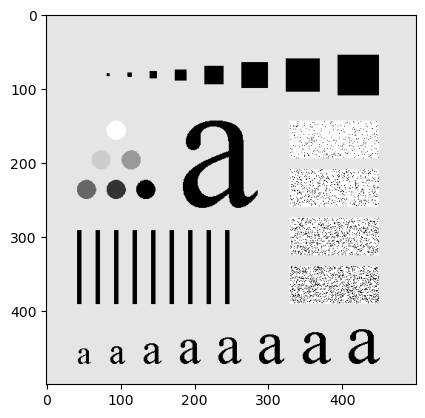

In [1]:
import cv2
import os
import requests
from matplotlib import pyplot as plt
import numpy as np
from scipy import signal

url = 'https://raw.githubusercontent.com/vision-agh/poc_sw/master/06_Context/'

fileNames = ["jet.png", "kw.png", "moon.png", "lenaSzum.png", "lena.png", "plansza.png"]
for fileName in fileNames:
  if not os.path.exists(fileName):
      r = requests.get(url + fileName, allow_redirects=True)
      open(fileName, 'wb').write(r.content)

img = dict()
for fileName in fileNames:
    I = cv2.imread(fileName)
    I = cv2.cvtColor(I, cv2.COLOR_BGR2GRAY)
    img[fileName[:-4]] = I

plt.imshow(img['plansza'], cmap='gray')
plt.show()

In [2]:
def test_filter2D(img, kernel_size=3, kernel=None, title='Po filtracji uśredniającej'):
    if kernel is None:
        kernel = np.ones((kernel_size, kernel_size), np.float32) / (kernel_size**2)
    fig, ax = plt.subplots(1, 3, figsize=(15,15))

    conv_img = cv2.filter2D(src=img, kernel=kernel, ddepth=-1)

    ax[0].imshow(img, cmap='gray')
    ax[0].set_title('Obraz oryginalny')

    ax[1].imshow(conv_img, cmap='gray')
    ax[1].set_title(title)

    sub_img = cv2.subtract(img.astype('int16'), conv_img.astype('int16'))
    sub_img = np.abs(sub_img)

    ax[2].imshow(sub_img, cmap='gray')
    ax[2].set_title('Moduł z różnicy')



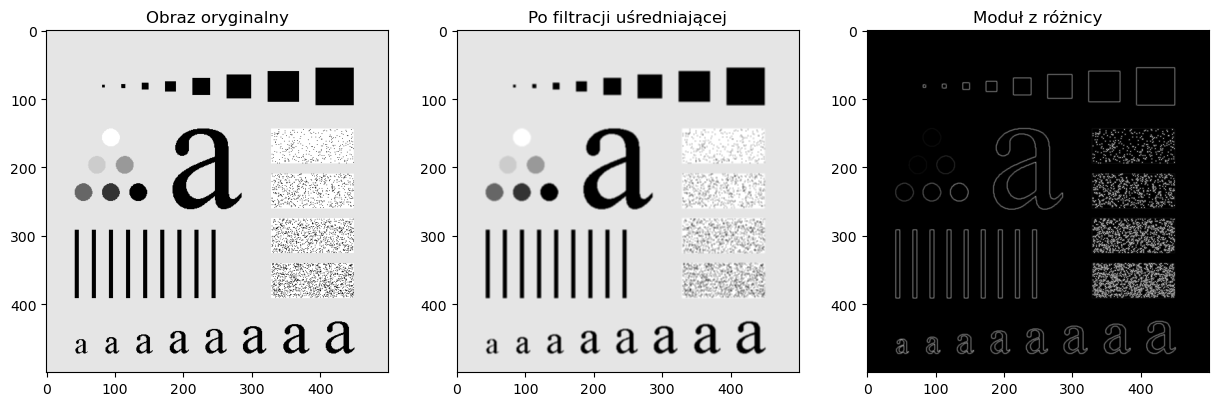

In [3]:
test_filter2D(img['plansza'])

5. Na wspólnym rysunku wyświetl wyniki filtracji uśredniającej z oknem o rozmiarze 3, 5, 9, 15 i 35. 
Wykorzystaj polecenie `plt.subplot`. 
Przeanalizuj wpływ rozmiaru maski na wynik. 

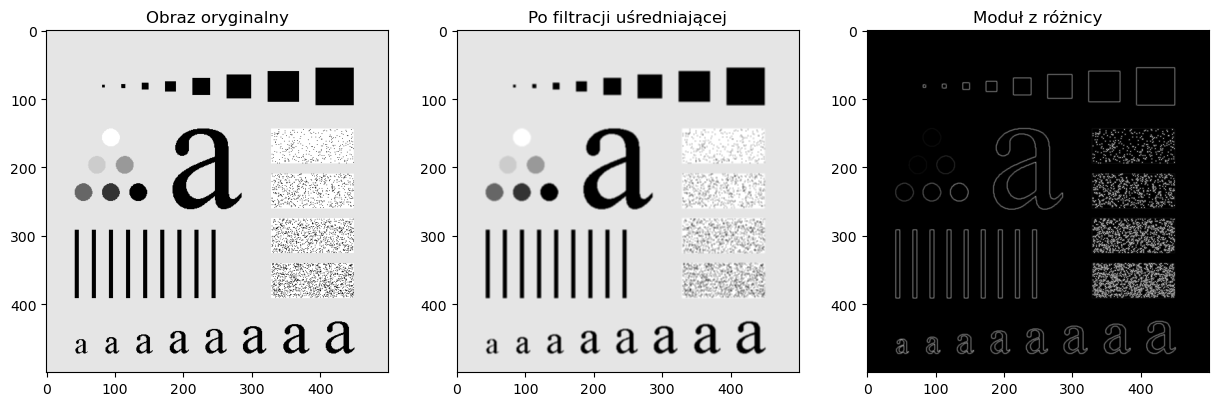

In [4]:
test_filter2D(img['plansza'], 3)

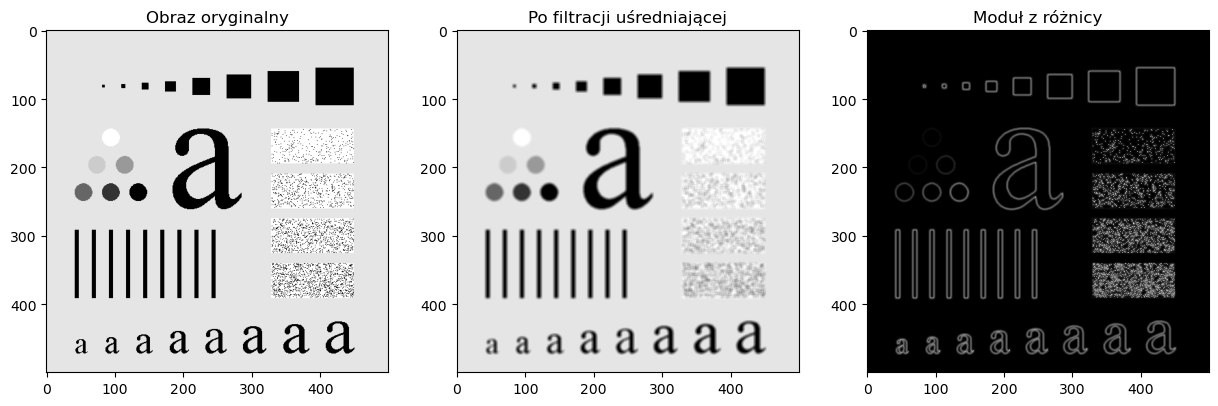

In [5]:
test_filter2D(img['plansza'], 5)

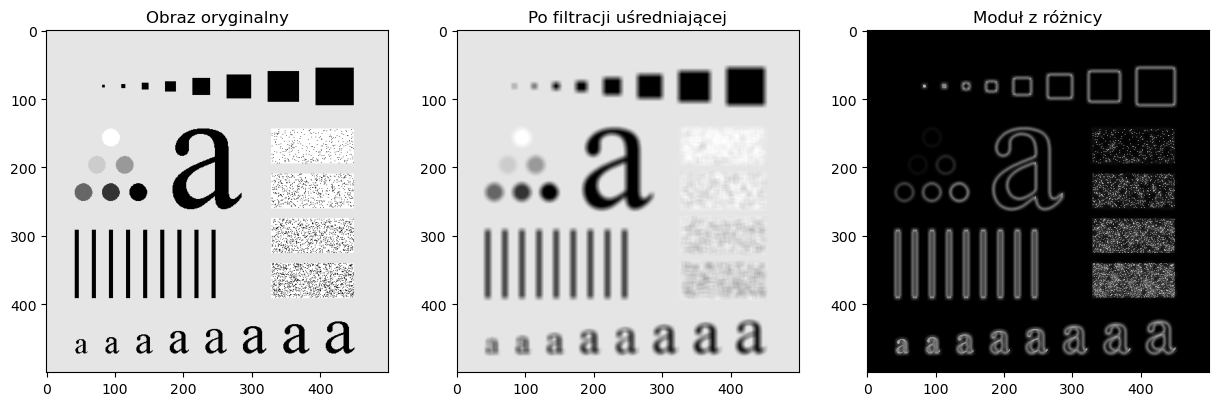

In [6]:
test_filter2D(img['plansza'], 9)

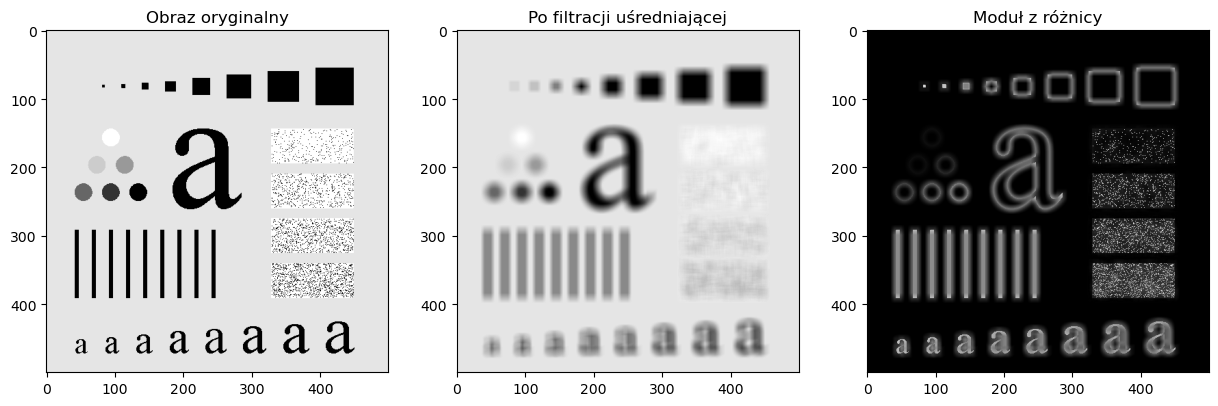

In [7]:
test_filter2D(img['plansza'], 15)

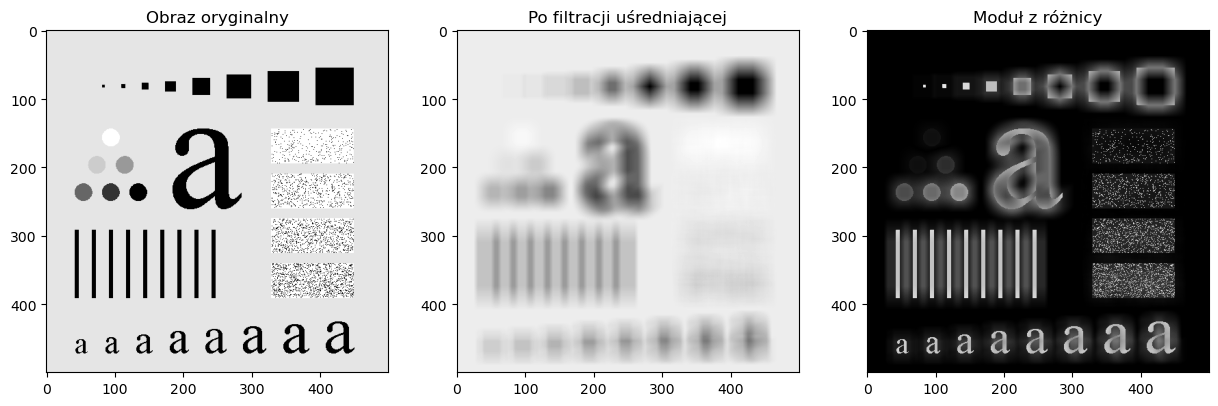

In [8]:
test_filter2D(img['plansza'], 35)

6. Wczytaj obraz _lena.png_.
Zaobserwuj efekty filtracji dolnoprzepustowej dla obrazu rzeczywistego.

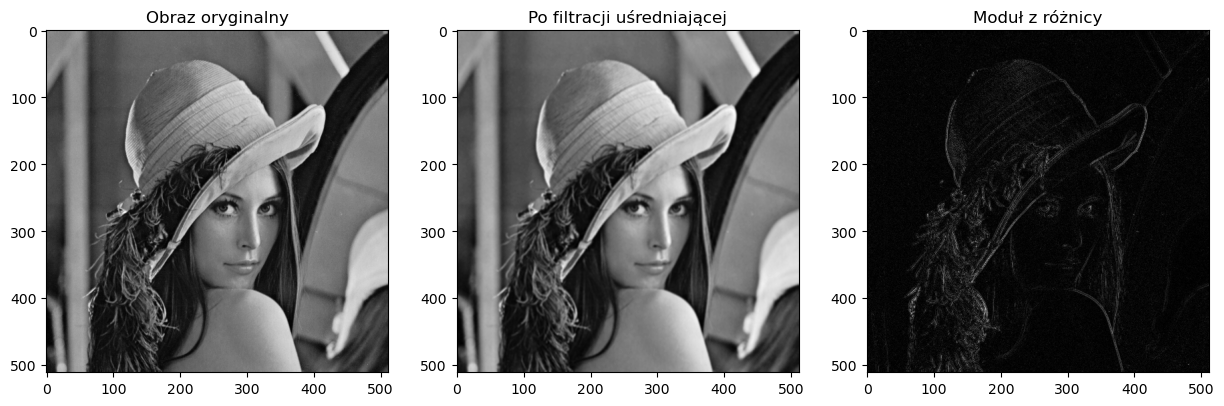

In [9]:
test_filter2D(img['lena'], 3)

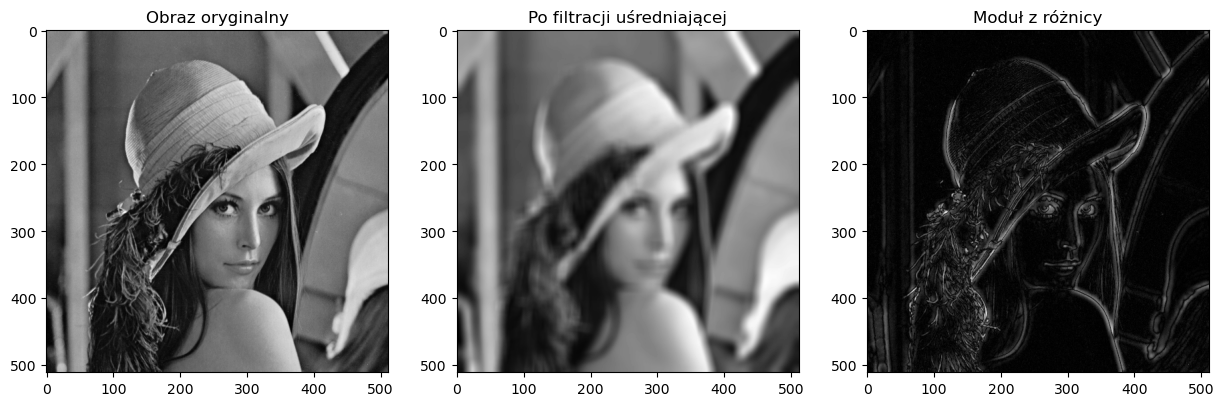

In [10]:
test_filter2D(img['lena'], 15)

7. Niekorzystny efekt towarzyszący wykonanym filtracjom dolnoprzepustowym to utrata ostrości. 
Częściowo można go zniwelować poprzez odpowiedni dobór maski. 
Wykorzystaj maskę:  `M = np.array([1 2 1; 2 4 2; 1 2 1])`. 
Przed obliczeniami należy jeszcze wykonać normalizację - podzielić każdy element maski przez sumę wszystkich elementów: `M = M/sum(sum(M));`.
Tak przygotowaną maskę wykorzystaj w konwolucji - wyświetl wyniki tak jak wcześniej.
Możliwe jest też wykorzystywanie innych masek - współczynniki można dopasowywać do konkretnego problemu.

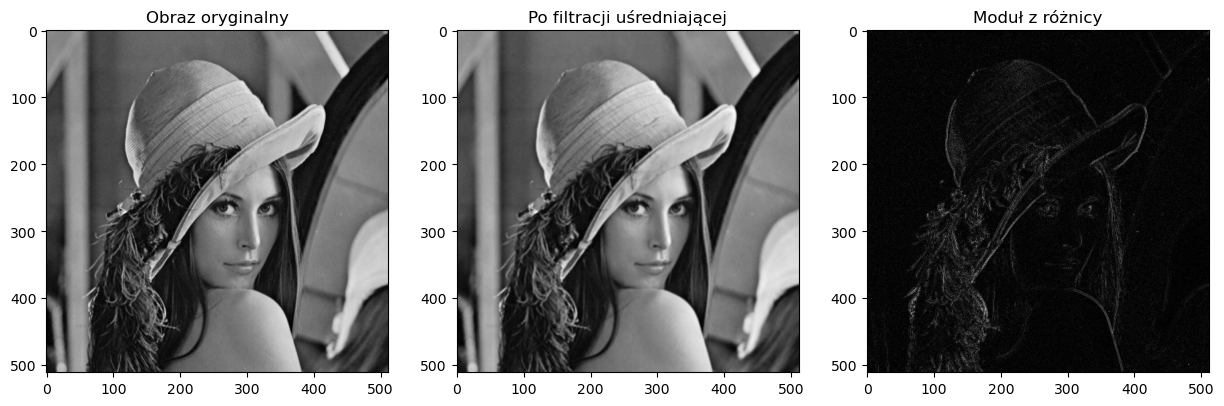

In [11]:
M = np.array([[1, 2, 1], [2, 4, 2,], [1, 2, 1]])
M = M/sum(sum(M))
test_filter2D(img['lena'], kernel=M)

8. Skuteczną i często wykorzystywaną maską jest tzw. maska Gasussa.
Jest to zbiór liczb, które aproksymują dwuwymiarowy rozkład Gaussa. 
Parametrem jest odchylenie standardowe i rozmiar maski.

9. Wykorzystując przygotowaną funkcję `fgaussian` stwórz maskę o rozmiarze $5 \times 5$ i odchyleniu standardowym 0.5.
  Wykorzystując funkcję `mesh` zwizualizuj filtr.
  Sprawdź jak parametr ``odchylenie standardowe'' wpływa na ``kształt'' filtru.

  Uwaga. W OpenCV dostępna jest *dedykowana* funkcja do filtracji Gaussa - `GaussianBlur`.
  Proszę na jednym przykładzie porównać jej działanie z użytym wyżej rozwiązaniem.

10. Wykonaj filtrację dla wybranych (2--3) wartości odchylenia standardowego.


In [12]:
def fgaussian(size, sigma):
     m = n = size
     h, k = m//2, n//2
     x, y = np.mgrid[-h:h+1, -k:k+1]
     g = np.exp(-(x**2 + y**2)/(2*sigma**2))
     return g /g.sum() 
    
    
def mesh(fun, size):
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    

    X = np.arange(-size//2, size//2, 1)
    Y = np.arange(-size//2, size//2, 1)
    X, Y = np.meshgrid(X, Y)
    Z = fun
    
    ax.plot_surface(X, Y, Z)
    
    plt.show()
    



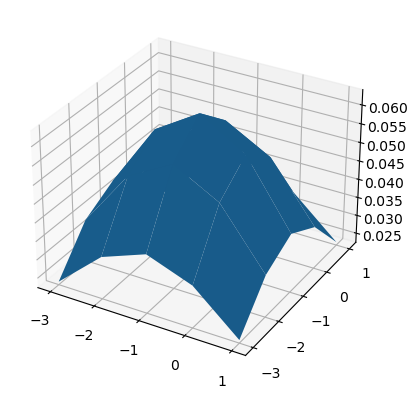

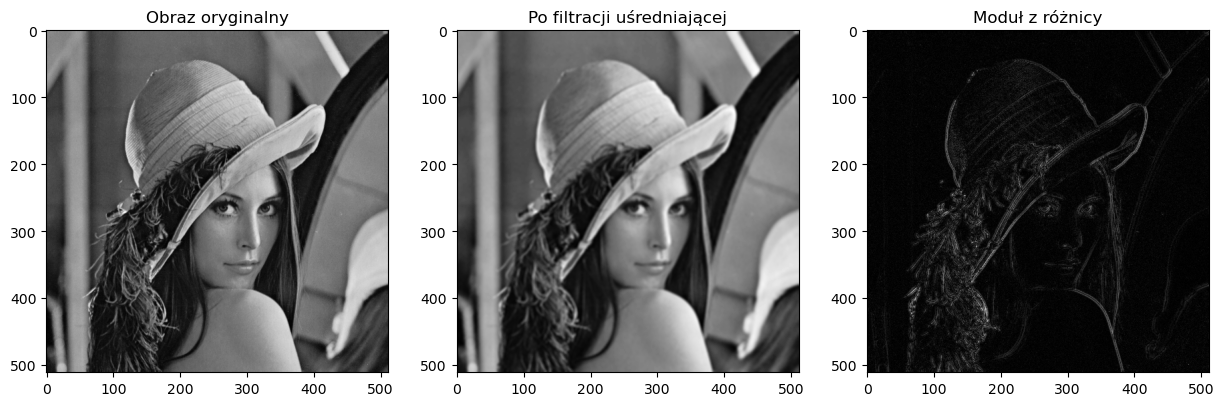

In [13]:
size = 5
sigma = 2
M = fgaussian(size, sigma)
mesh(M, size)
test_filter2D(img['lena'], kernel=M)

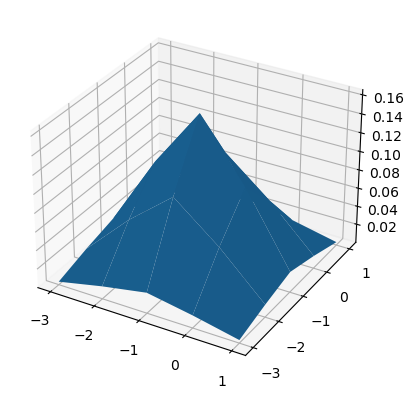

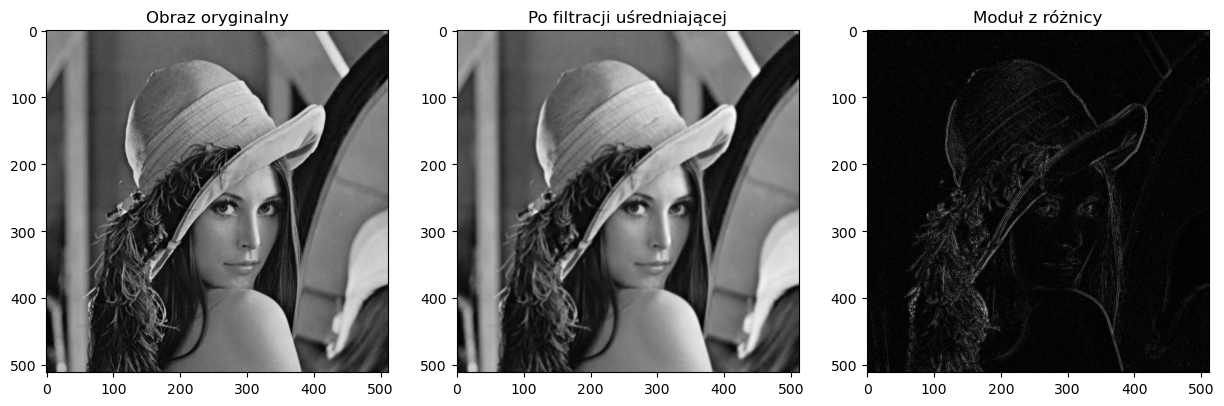

In [14]:
sigma = 1
M = fgaussian(size, sigma)
mesh(M, size)
test_filter2D(img['lena'], kernel=M)

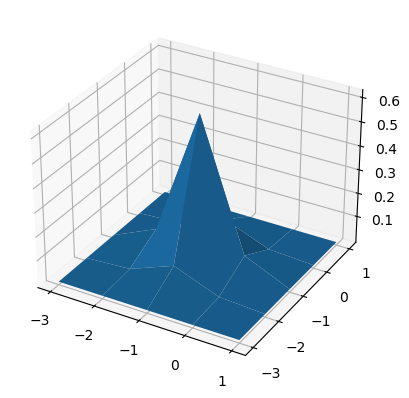

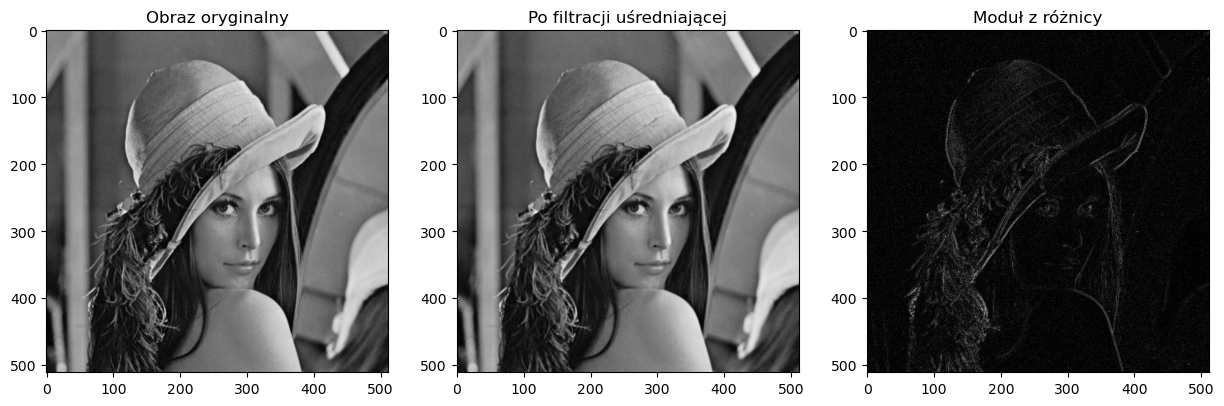

In [15]:
sigma = 0.5
M = fgaussian(size, sigma)
mesh(M, size)
test_filter2D(img['lena'], kernel=M)

### Filtry nieliniowe -- mediana

Filtry rozmywające redukują szum, ale niekorzystnie wpływają na ostrość obrazu.
Dlatego często wykorzystuje się filtry nieliniowe - np. filtr medianowy (dla przypomnienia: mediana - środkowa wartość w posortowanym ciągu liczb).

Podstawowa różnica pomiędzy filtrami liniowymi, a nieliniowymi polega na tym, że przy filtracji liniowej na nową wartość piksela ma wpływ wartość wszystkich pikseli z otoczenia (np. uśrednianie, czasem ważone), natomiast w przypadku filtracji nieliniowej jako nowy piksel wybierana jest któraś z wartości otoczenia - według jakiegoś wskaźnika (wartość największa, najmniejsza czy właśnie mediana).


1. Wczytaj obraz _lenaSzum.png_ (losowe 10% pikseli białych lub czarnych - tzw. zakłócenia impulsowe). Przeprowadź filtrację uśredniającą z rozmiarem maski 3x3. Wyświetl, podobnie jak wcześniej, oryginał, wynik filtracji i moduł z różnicy. Wykorzystując funkcję ``cv2.medianBlur` wykonaj filtrację medianową _lenaSzum.png_ (z rozmiarem maski $3 \times 3$). Wyświetl, podobnie jak wcześniej, oryginał, wynik filtracji i moduł z różnicy. Która filtracja lepiej radzi sobie z tego typu szumem?

  Uwaga. Taki sam efekt da również użycie funkcji `signal.medfilt2d`.


In [16]:
def test_medianBlur(img, kernel_size=3):

    kernel = np.ones((kernel_size, kernel_size))

    fig, ax = plt.subplots(1, 3, figsize=(15,15))

    conv_img = cv2.medianBlur(src=img, ksize=kernel_size)

    ax[0].imshow(img, cmap='gray')
    ax[0].set_title('Obraz oryginalny')

    ax[1].imshow(conv_img, cmap='gray')
    ax[1].set_title('Po filtracji medianowej')

    sub_img = cv2.subtract(img.astype('int16'), conv_img.astype('int16'))
    sub_img = np.abs(sub_img)

    ax[2].imshow(sub_img, cmap='gray')
    ax[2].set_title('Moduł z różnicy')

2. Przeprowadź filtrację uśredniającą, a następnie medianową obrazu _lena.png_.
   Wyniki porównaj - dla obu wyświetl: oryginał, wynik filtracji i moduł z różnicy.
   Szczególną uwagę zwróć na ostrość i krawędzie.
   W której filtracji krawędzie zostają lepiej zachowane?

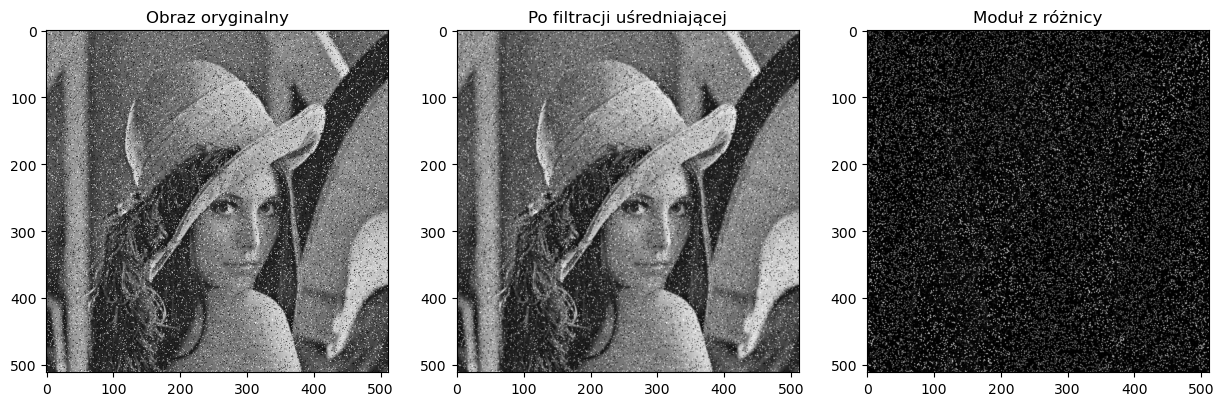

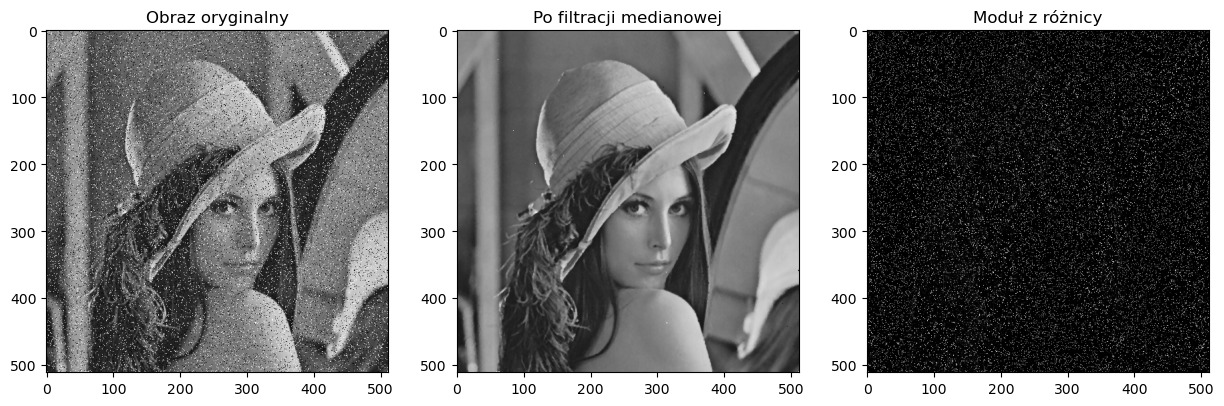

In [17]:
test_filter2D(img['lenaSzum'], kernel=M)
test_medianBlur(img['lenaSzum'])

3. Ciekawy efekt można uzyskać wykonując filtrację medianową wielokrotnie. Określa się go mianem  posteryzacji.  W wyniku przetwarzania z obrazka usunięte zostają detale, a duże obszary uzyskują tą samą wartość jasności.  Wykonaj operację mediany $5 \times 5$ na obrazie _lena.png_ 10-krotnie. (wykorzystaj np. pętlę `for`).


Inne filtry nieliniowe:
- filtr modowy - moda (dominanta) zamiast mediany,
- filtr olimpijski - średnia z podzbioru otoczenia (bez wartości ekstremalnych),
- hybrydowy filtr medianowy - mediana obliczana osobno w różnych podzbiorach otoczenia (np. kształt ``x'',``+''), a jako wynik brana jest mediana ze zbioru wartość elementu centralnego, mediana z ``x'' i mediana z ``+'',
- filtr minimalny i maksymalny (będą omówione przy okazji operacji morfologicznych w dalszej części kursu).


Warto zdawać sobie sprawę, z szerokich możliwości dopasowywania rodzaju filtracji do konkretnego rozważanego problemu i rodzaju zaszumienia występującego na obrazie.

Text(0.5, 1.0, 'Moduł z różnicy')

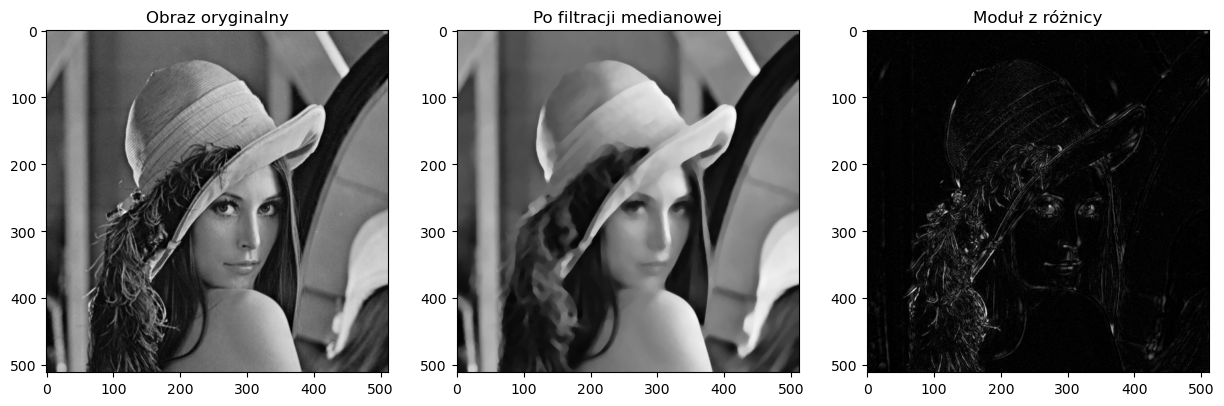

In [18]:
conv_img = img['lena']
for _ in range(10):
    conv_img = cv2.medianBlur(src=conv_img, ksize=5)

fig, ax = plt.subplots(1, 3, figsize=(15,15))

ax[0].imshow(img['lena'], cmap='gray')
ax[0].set_title('Obraz oryginalny')

ax[1].imshow(conv_img, cmap='gray')
ax[1].set_title('Po filtracji medianowej')

sub_img = cv2.subtract(img['lena'].astype('int16'), conv_img.astype('int16'))
sub_img = np.abs(sub_img)

ax[2].imshow(sub_img, cmap='gray')
ax[2].set_title('Moduł z różnicy')

## Filtry liniowe górnoprzepustowe (wyostrzające, wykrywające krawędzie)

Zadaniem filtrów górnoprzepustowych jest wydobywanie z obrazu składników odpowiedzialnych za szybkie zmiany jasności - konturów, krawędzi, drobnych elementów tekstury.

### Laplasjan (wykorzystanie drugiej pochodnej obrazu)

1. Wczytaj obraz _moon.png_.

2. Wprowadź podstawową maskę laplasjanu:
\begin{equation}
M = 
\begin{bmatrix}
0 & 1& 0 \\ 1 & -4 & 1 \\ 0 & 1 & 0
\end{bmatrix}
\end{equation}

3. Przed rozpoczęciem obliczeń należy dokonać normalizacji maski - dla rozmiaru $3 \times 3$ podzielić każdy element przez 9.
   Proszę zwrócić uwagę, że nie można tu zastosować takiej samej normalizacji, jak dla filtrów dolnoprzepustowanych, gdyż skutkowałby to dzieleniem przez 0.

4. Wykonaj konwolucję obrazu z maską (`c2.filter2D`). Przed wyświetleniem, wynikowy obraz należy poddać normalizacji (występują ujemne wartości). Najczęściej wykonuje się jedną z dwóch operacji:
- skalowanie (np. poprzez dodatnie 128 do każdego z pikseli),
- moduł (wartość bezwzględna).

Wykonaj obie normalizacje. 
Na wspólnym wykresie wyświetl obraz oryginalny oraz przefiltrowany po obu normalizacjach. 

In [19]:
def test_filter2D_laplace(img, kernel_size=3, kernel=None, norm='scale', plot=True):
    if kernel is None:
        kernel = np.ones((kernel_size, kernel_size), np.float32)

    conv_img = cv2.filter2D(src=img, kernel=kernel, ddepth=-1)
    if norm == 'scale':
        conv_img += 128
    elif norm == 'abs':
        conv_img = np.abs(conv_img)

    if plot:
        fig, ax = plt.subplots(1, 3, figsize=(15,15))

        ax[0].imshow(img, cmap='gray')
        ax[0].set_title('Obraz oryginalny')

        ax[1].imshow(conv_img, cmap='gray')
        ax[1].set_title('Obraz wynikowy')

        sub_img = cv2.subtract(img.astype('int16'), conv_img.astype('int16'))
        sub_img = np.abs(sub_img)

        ax[2].imshow(sub_img, cmap='gray')
        ax[2].set_title('Moduł z różnicy')
    return conv_img

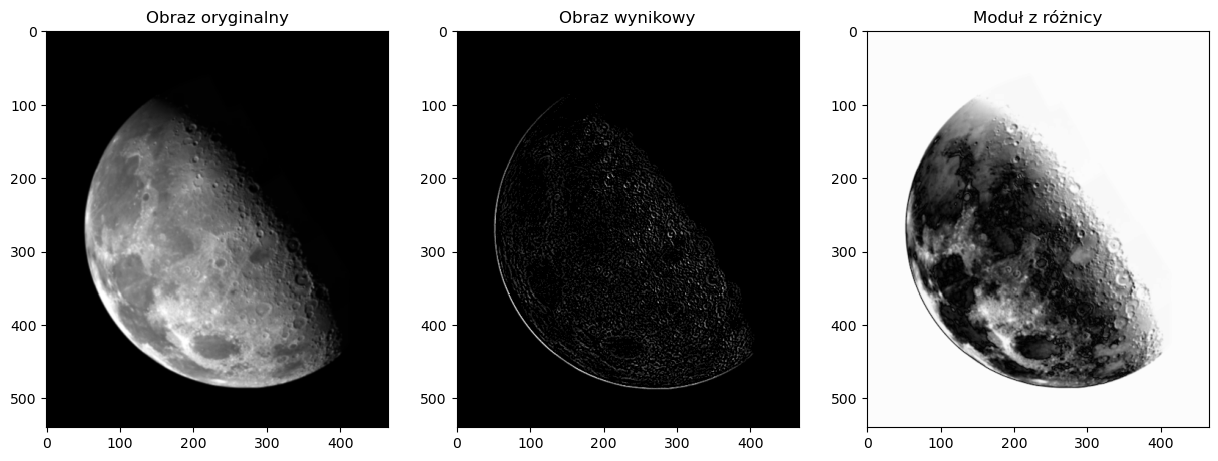

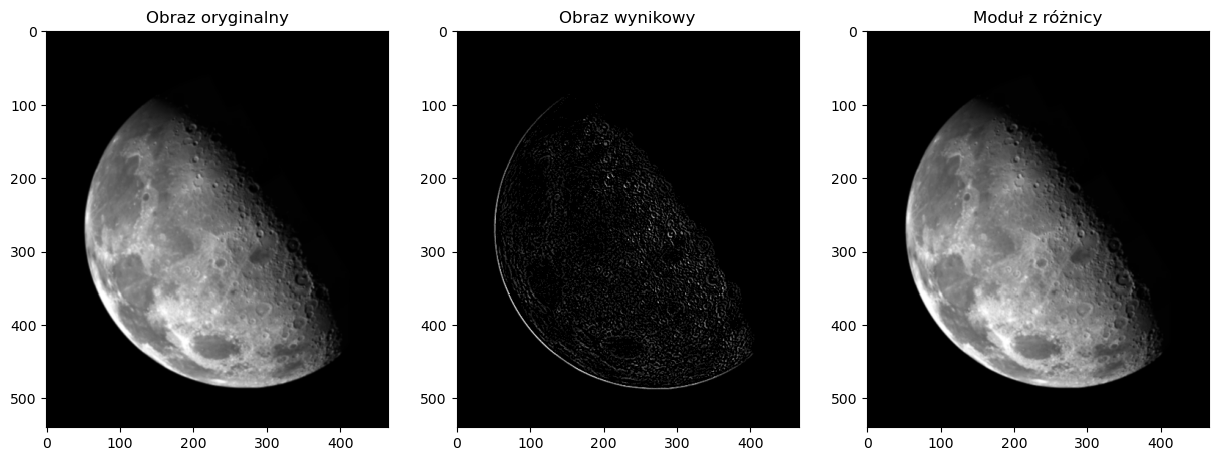

In [20]:
M_laplace = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]])/9
_ = test_filter2D_laplace(img['moon'], kernel=M_laplace, norm='scale')
_ = test_filter2D_laplace(img['moon'], kernel=M_laplace, norm='abs')

7. Efekt wyostrzenia uzyskuje się po odjęciu/dodaniu (zależy do maski) rezultatu filtracji laplasjanowej i oryginalnego obrazu. Wyświetl na jednym wykresie: obraz oryginalny, sumę oryginału i wyniku filtracji oraz różnicę (bezwzględną) oryginału i wyniku filtracji.
 Uwaga. Aby uniknąć artefaktów, należy obraz wejściowy przekonwertować do formatu ze znakiem.



Text(0.5, 1.0, 'Moduł z różnicy')

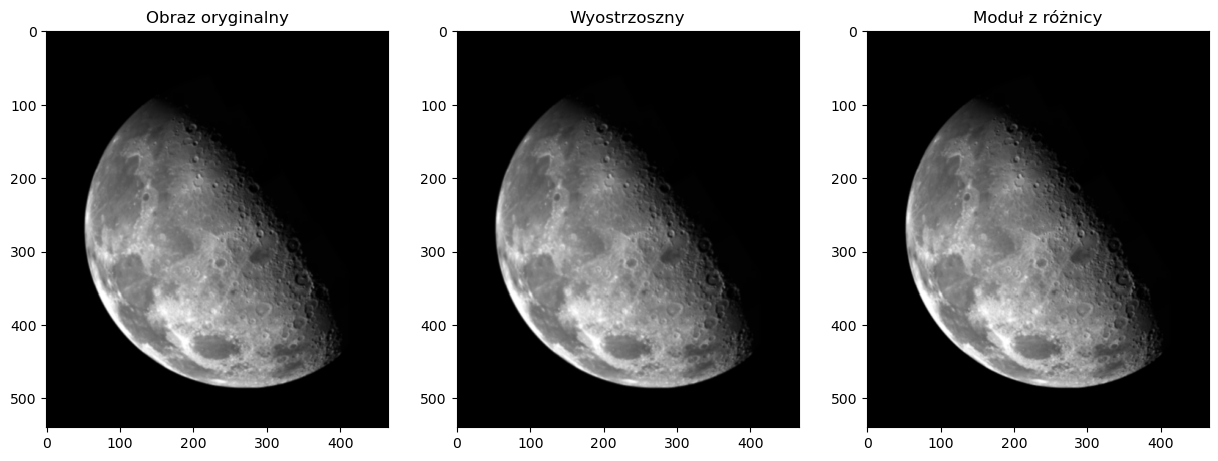

In [21]:
conv_img = test_filter2D_laplace(img['moon'], kernel=M_laplace, norm='abs', plot=False)


fig, ax = plt.subplots(1, 3, figsize=(15,15))

ax[0].imshow(img['moon'], cmap='gray')
ax[0].set_title('Obraz oryginalny')

res = img['moon'] + conv_img 

ax[1].imshow(res, cmap='gray')
ax[1].set_title('Wyostrzoszny')

sub_img = cv2.subtract(img['moon'].astype('int16'), conv_img.astype('int16'))
sub_img = np.abs(sub_img)

ax[2].imshow(sub_img, cmap='gray')
ax[2].set_title('Moduł z różnicy')

### Gradienty (wykorzystanie pierwszej pochodnej obrazu)

1. Wczytaj obraz _kw.png_. Stwórz odpowiednie maski opisane w kolejnych punktach i dokonaj filtracji.
2. Wykorzystując gradient Robertsa przeprowadź detekcję krawędzi - poprzez wykonanie konwolucji obrazu z daną maską:
\begin{equation}
R1 = \begin{bmatrix} 0 & 0 & 0 \\ -1 & 0 & 0 \\ 0 & 1 & 0 \end{bmatrix}   
R2 = \begin{bmatrix} 0 & 0 & 0 \\ 0 & 0 & -1 \\ 0 & 1 & 0 \end{bmatrix}
\end{equation}

Wykorzystaj stworzony wcześniej kod (przy laplasjanie) - dwie metody normalizacji oraz sposób wyświetlania.

3. Analogicznie przeprowadź detekcję krawędzi za pomocą gradientu Prewitta (pionowy i poziomy)
\begin{equation}
P1 = \begin{bmatrix} -1 & 0 & 1 \\ -1 & 0 & 1 \\ -1 & 0 & 1 \end{bmatrix}   
P2 = \begin{bmatrix} -1 & -1 & -1 \\ 0 & 0 & 0 \\ 1 & 1 & 1 \end{bmatrix}
\end{equation}

4. Podobnie skonstruowany jest gradient Sobela (występuje osiem masek, zaprezentowane są dwie ``prostopadłe''):
\begin{equation}
S1 = \begin{bmatrix} -1 & 0 & 1 \\ -2 & 0 & 2 \\ -1 & 0 & 1 \end{bmatrix}   
S2 = \begin{bmatrix} -1 & -2 & -1 \\ 0 & 0 & 0 \\ 1 & 2 & 1 \end{bmatrix}
\end{equation}

Przeprowadź detekcję krawędzi za pomocą gradientu Sobela. 

In [22]:
R1 = np.array([[ 0, 0, 0],
               [-1, 0, 0],
               [ 0, 1, 0]])

R2 = np.array([[ 0, 0,  0],
               [ 0, 0, -1],
               [ 0, 1,  0]])

P1 = np.array([[-1, 0, 0],
               [-1, 0, 0],
               [-1, 1, 0]])

P2 = np.array([[-1, -1, -1],
               [ 0,  0,  0],
               [ 1,  1,  1]])

S1 = np.array([[-1, 0, 1],
               [-2, 0, 2],
               [-1, 0, 1]])

S2 = np.array([[-1, -2, -1],
               [ 0,  0,  0],
               [ 1,  2,  1]])

#### Gradienty Robertsa:

##### R1:

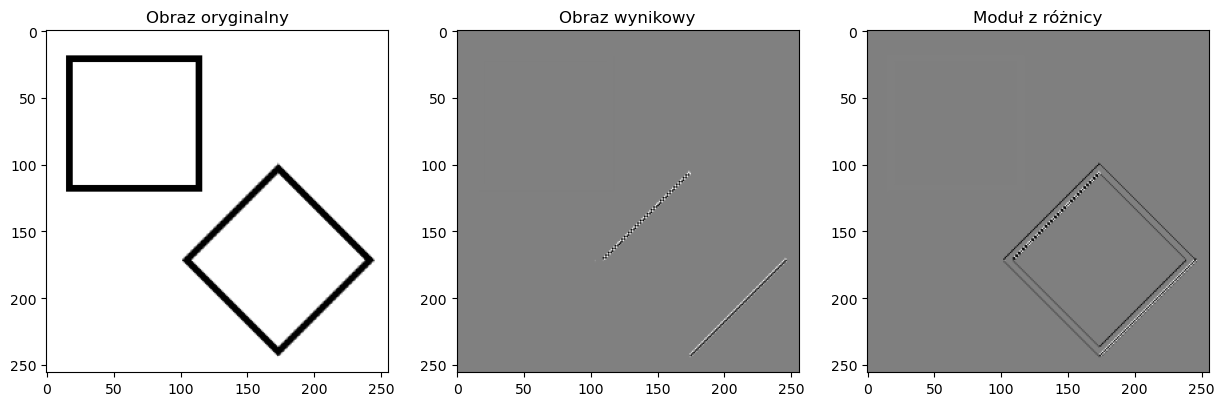

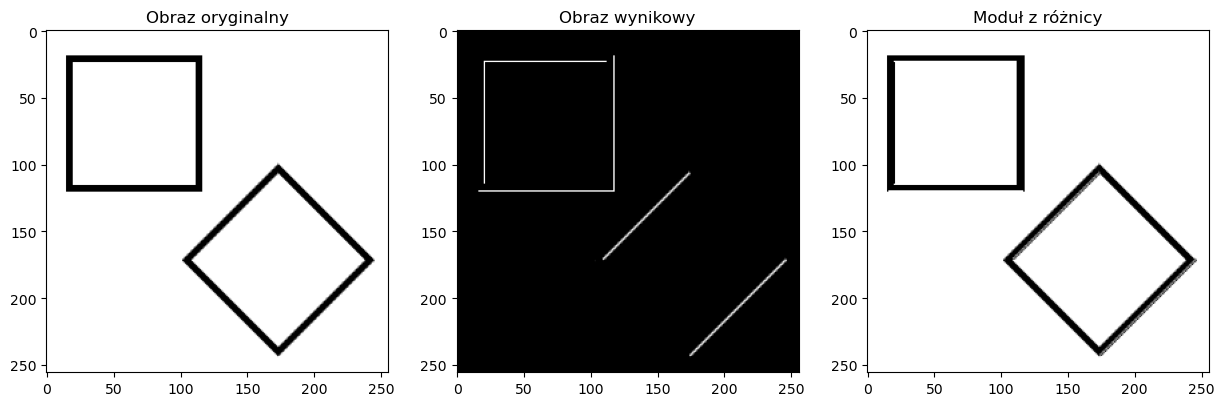

In [23]:
_ = test_filter2D_laplace(img['kw'], kernel=R1, norm='scale')
_ = test_filter2D_laplace(img['kw'], kernel=R1, norm='abs')

##### R2:

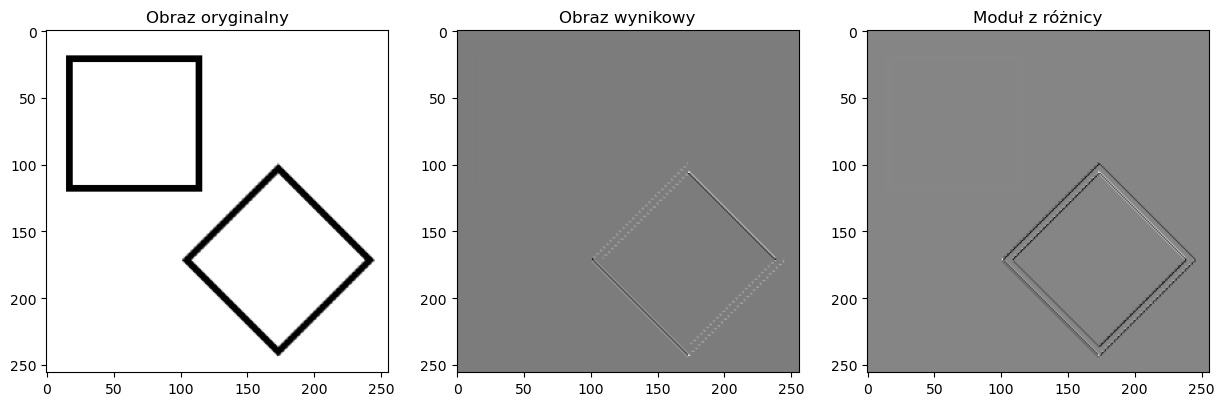

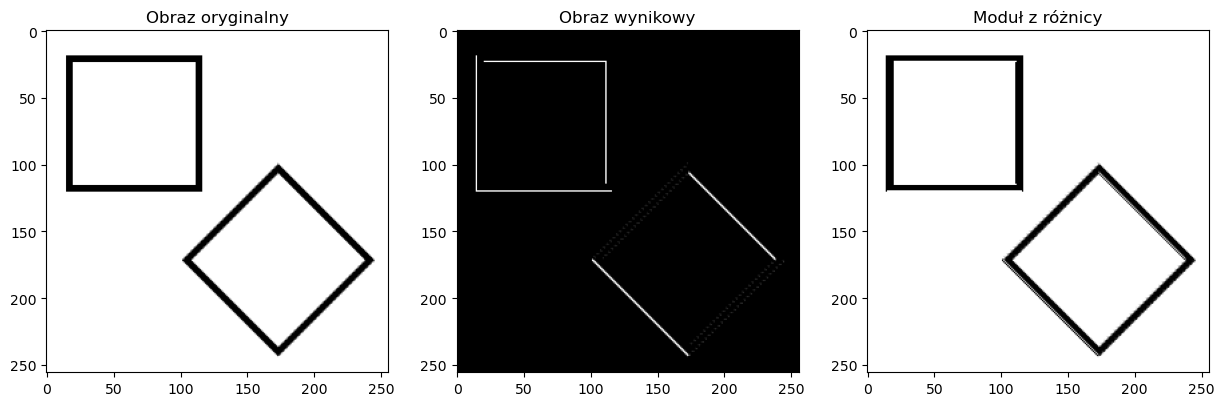

In [24]:
_ = test_filter2D_laplace(img['kw'], kernel=R2, norm='scale')
_ = test_filter2D_laplace(img['kw'], kernel=R2, norm='abs')

#### Gradient Prewwita:

##### P1:

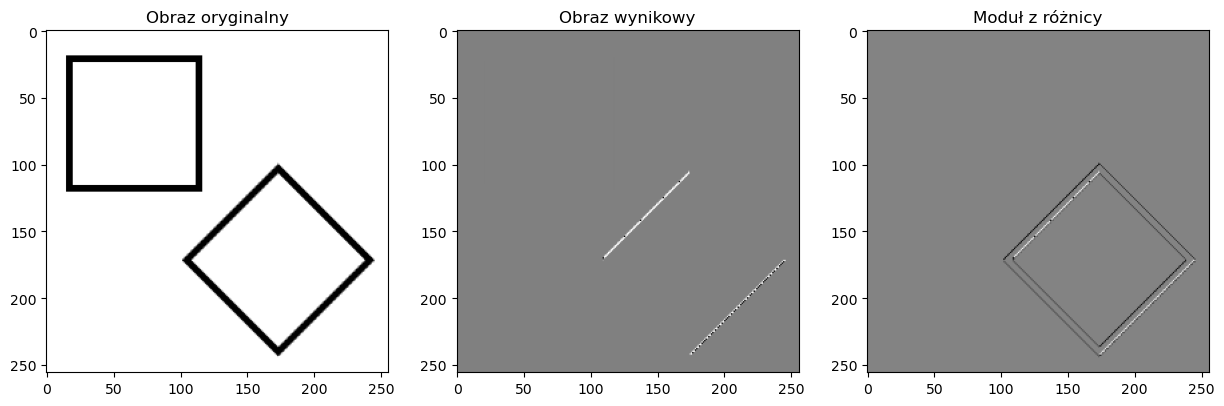

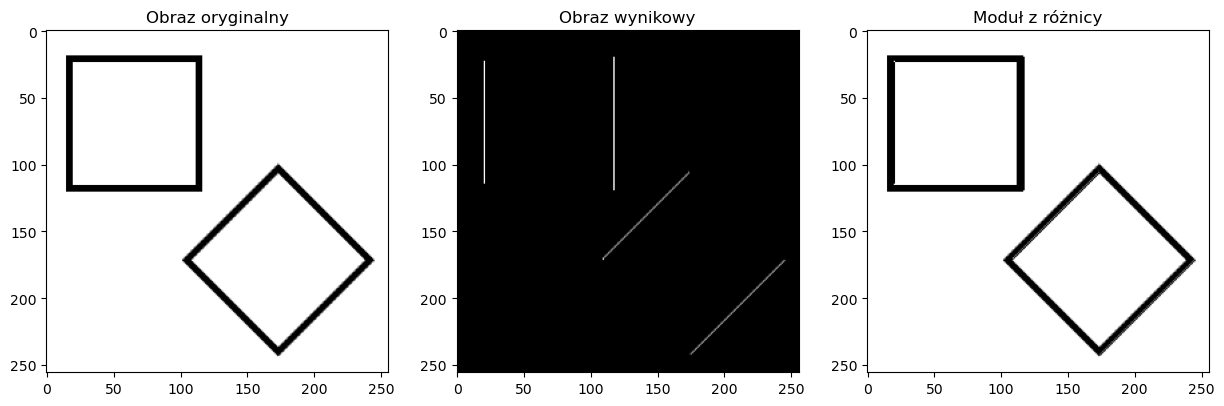

In [25]:
_ = test_filter2D_laplace(img['kw'], kernel=P1, norm='scale')
_ = test_filter2D_laplace(img['kw'], kernel=P1, norm='abs')

##### P2:

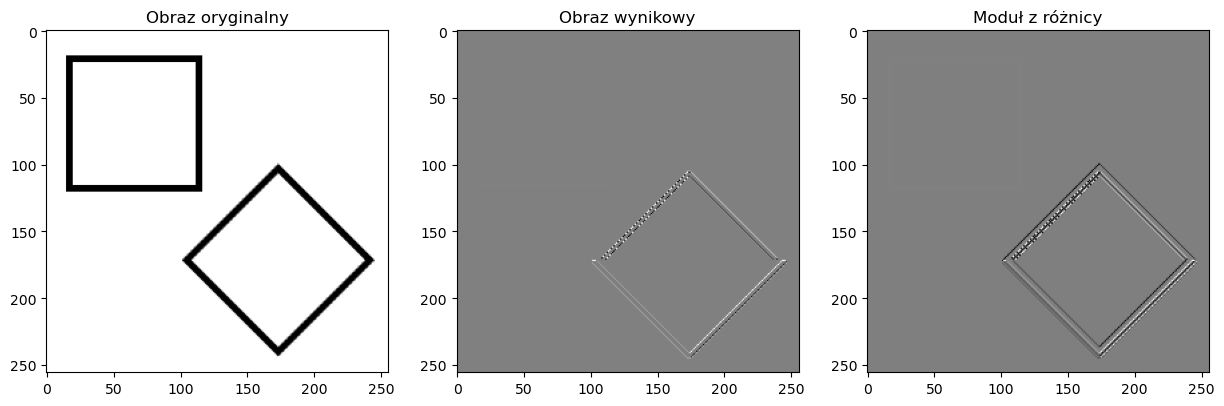

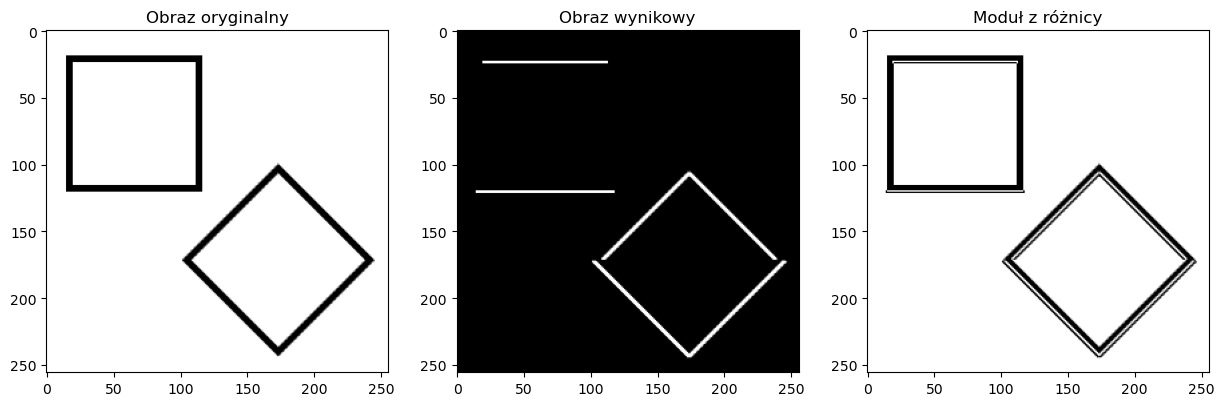

In [26]:
_ = test_filter2D_laplace(img['kw'], kernel=P2, norm='scale')
_ = test_filter2D_laplace(img['kw'], kernel=P2, norm='abs')

#### Gradient Sobela

#####S1:

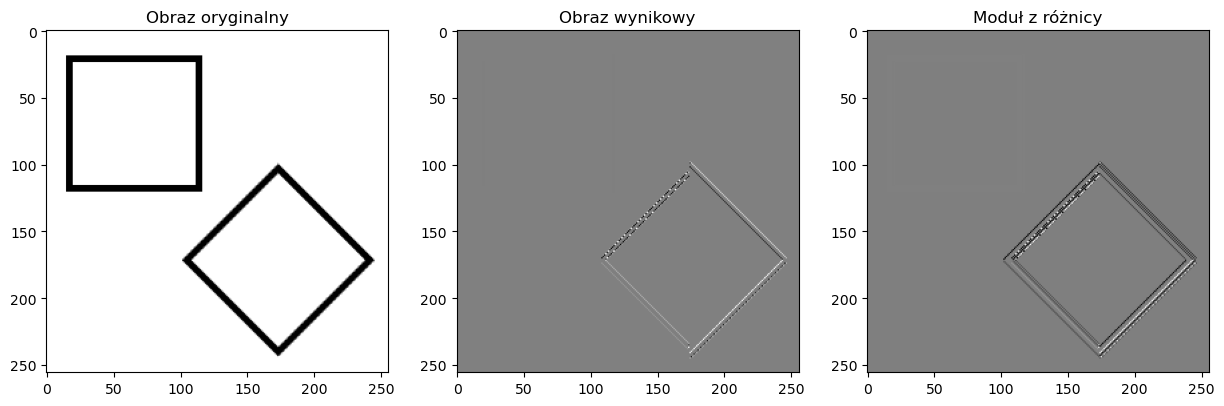

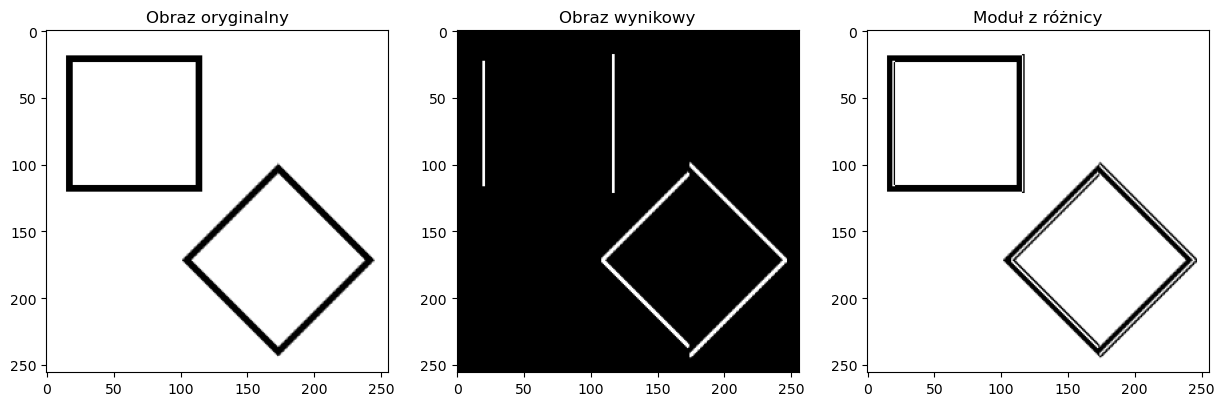

In [27]:
_ = test_filter2D_laplace(img['kw'], kernel=S1, norm='scale')
_ = test_filter2D_laplace(img['kw'], kernel=S1, norm='abs')

##### S2:

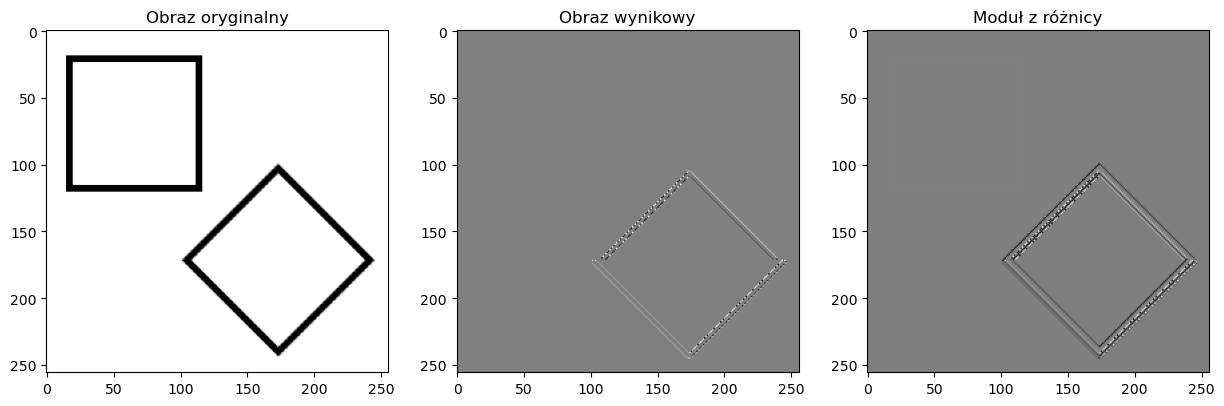

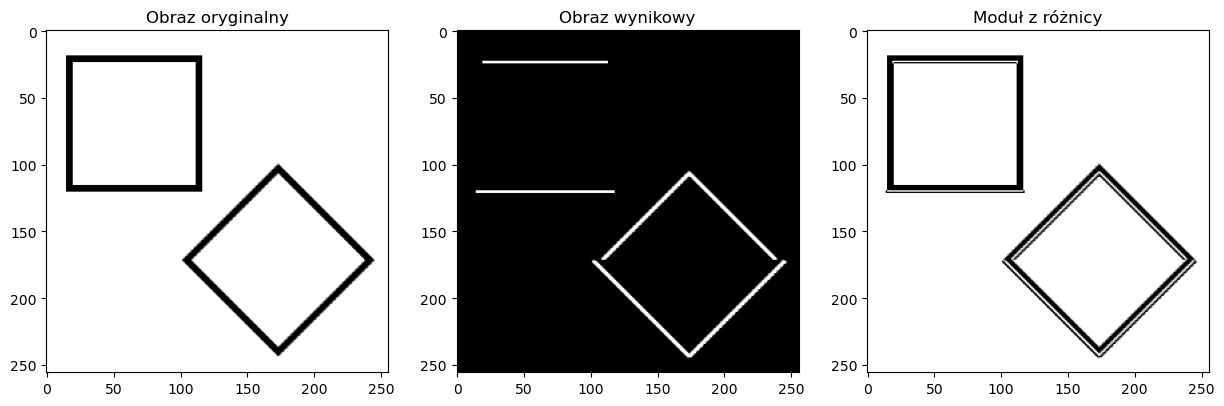

In [28]:
_ = test_filter2D_laplace(img['kw'], kernel=S2, norm='scale')
_ = test_filter2D_laplace(img['kw'], kernel=S2, norm='abs')

5. Na podstawie dwóch ortogonalnych masek np. Sobela można stworzyć tzw. filtr kombinowany - pierwiastek kwadratowy z sumy kwadratów gradientów:
\begin{equation}
OW = \sqrt{(O * S1)^2 + (O * S2)^2}
\end{equation}
gdzie:  $OW$ - obraz wyjściowy, $O$ - obraz oryginalny (wejściowy), $S1,S2$ - maski Sobela, $*$ - operacja konwolucji.

Zaimplementuj filtr kombinowany.

Uwaga. Proszę zwrócić uwagę na konieczność zmiany formatu danych obrazu wejściowego - na typ znakiem



In [29]:
def combined(img, M1, M2, norm='abs'):
    tmp_1 = test_filter2D_laplace(img, kernel=M1, norm=norm, plot=False)
    tmp_2 = test_filter2D_laplace(img, kernel=M2, norm=norm, plot=False)

    return np.sqrt(tmp_1.astype(np.int32)**2 + tmp_2.astype(np.int32)**2)

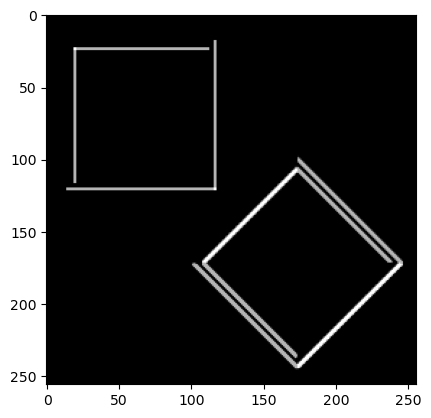

In [30]:
combined_img = combined(img['kw'], S1, S2)
plt.imshow(combined_img, cmap='gray')
plt.show()

6. Istnieje alternatywna wersja filtra kombinowanego, która zamiast pierwiastka z sumy kwadratów wykorzystuje sumę modułów (prostsze obliczenia). 
Zaimplementuj tę wersję. 

In [31]:
def alt_combined(img, M1, M2, norm='abs'):
    tmp_1 = test_filter2D_laplace(img, kernel=M1, norm=norm, plot=False)
    tmp_2 = test_filter2D_laplace(img, kernel=M2, norm=norm, plot=False)

    return np.abs(tmp_1.astype(np.int32)) + np.abs(tmp_2.astype(np.int32))

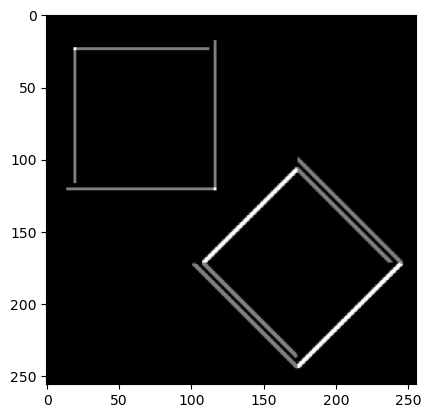

In [32]:
alt_combined_img = alt_combined(img['kw'], S1, S2)
plt.imshow(alt_combined_img, cmap='gray')
plt.show()

7. Wczytaj plik _jet.png_ (zamiast _kw.png_).
Sprawdź działanie obu wariantów filtracji kombinowanej.

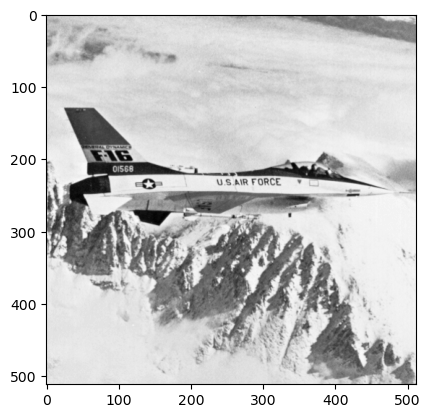

In [33]:
plt.imshow(img['jet'], cmap='gray')
plt.show()

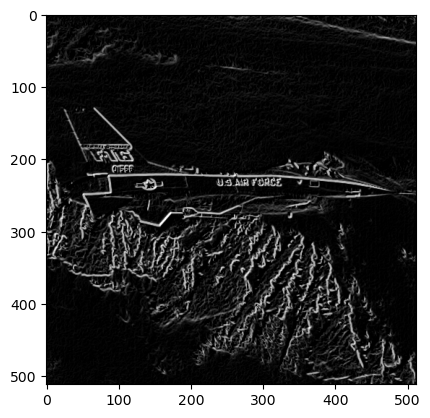

In [34]:
combined_img = combined(img['jet'], S1, S2)
plt.imshow(combined_img, cmap='gray')
plt.show()

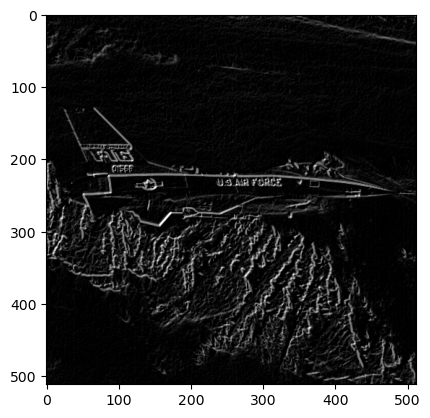

In [35]:
alt_combined_img = alt_combined(img['jet'], S1, S2)
plt.imshow(alt_combined_img, cmap='gray')
plt.show()